# Project 2: Choosing a Model for Predicting on Unseen Data

Before we start, please put your name and CUID in following format

Nianyi LI, #12345678

**Your Answer:**   
Jack CARSON, #53602298

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P2.ipynb**, then zip it and upload to Canvas

### Package usage
You <span style="color:red">**cannot**</span> use python machine learning package that can have the k-fold validation algorithm as embedded function, for instance, **sklearn** package.

# Project Description

For Project 2 you will create a regression program and choose a model to predict the women’s Olympic 100-meter race record time for year **2024**. We will code the year of each race as we did in lecture 2.3. 

![caption](https://nianyil.people.clemson.edu/CPSC_4430/P2.jpg)


## Data File

A text file with the data is available on Canvas for the years 1928 through 2008 when the Olympics were held. The first line of the text file indicating there’re **m** lines of data and a **n** number of features (in this case, one). You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.

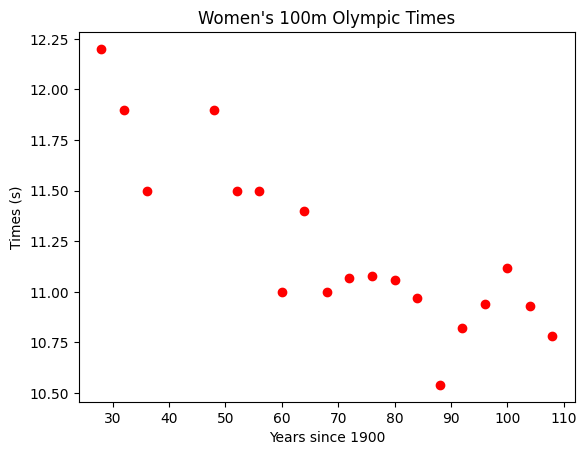

In [1]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
import numpy as np
import matplotlib.pyplot as plt

data = []
file = open("W100MTimes.txt", "r")

features = float(file.readline().strip().split()[0])
for line in file:
    line = line.strip()
    x, y = line.split()
    x = float(x)
    y = float(y)
    data.append([x, y])

years = []
times = []
for i in range(len(data)):
    years.append(data[i][0])
    times.append(data[i][1])

plt.plot(years, times, 'ro')
plt.xlabel('Years since 1900')
plt.ylabel('Times (s)')
plt.title("Women's 100m Olympic Times")
plt.show()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Pick the Best Model

Your project assignment is to compare four different models, linear, quadratic, cubic, and fourth. 

- $h_w(x) = w_0 + w_1x$
- $h_w(x) = w_0 + w_1x + w_2x^2$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3 + w_4x^4$


In [2]:
##############################################################################
#                 TODO: Define the regression models                         #
##############################################################################
def regression_equation(X, Y):
    return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(Y))

def linear_regression(X, Y):
    X_matrix = np.array([X, np.ones(len(X))]).transpose()
    Y_matrix = np.array(Y)
    return regression_equation(X_matrix, Y_matrix)

def quadratic_regression(X, Y):
    X_matrix = np.array([np.power(X, 2), X, np.ones(len(X))]).transpose()
    Y_matrix = np.array(Y)
    return regression_equation(X_matrix, Y_matrix)

def cubic_regression(X, Y):
    X_matrix = np.array([np.power(X, 3), np.power(X, 2), X, np.ones(len(X))]).transpose()
    Y_matrix = np.array(Y)
    return regression_equation(X_matrix, Y_matrix)

def fourth_regression(X, Y):
    X_matrix = np.array([np.power(X, 4), np.power(X, 3), np.power(X, 2), X, np.ones(len(X))]).transpose()
    Y_matrix = np.array(Y)
    return regression_equation(X_matrix, Y_matrix)
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, you need to use <span style="color:red">**5-fold cross validation**</span> to pick out the best model for the prediction. You should present a chart of the error function $J$, similar to the one in the lecture (see below). You may need to use package like "**tabulate**" to print out the table.

```
                     Linear    Quadratic    Cubic    Fourth
-----------------  --------  -----------  -------  --------
1234                  10.25        24.25    12.25     23.25
5                     10.25        19.25    14.25     23.25
1235                  10.25        15.25    19.25     23.25
4                     10.25        10.25    20.25     23.25
1245                  10.25        24.25    12.25     23.25
3                     10.25        19.25    14.25     23.25
1345                  10.25        24.25    12.25     23.25
2                     10.25        19.25    14.25     23.25
2345                  10.25        24.25    12.25     23.25
1                     10.25        19.25    14.25     23.25
Mean for Training      0            0        0         0
Mean for Testing       0            0        0         0
```

You need to **plot** your training and testing $J$ with respect to the polynomial degree, similar to the one in the lecture.

In [3]:
##############################################################################
#                     TODO: 5-fold cross-validation                         #
##############################################################################
years_folds = np.array_split(years, 5)
times_folds = np.array_split(times, 5)

# Split data into 5 folds
train_years_1 = np.concatenate((years_folds[0], years_folds[1], years_folds[2], years_folds[3]))
train_times_1 = np.concatenate((times_folds[0], times_folds[1], times_folds[2], times_folds[3]))
test_years_1 = years_folds[4]
test_times_1 = times_folds[4]

train_years_2 = np.concatenate((years_folds[0], years_folds[1], years_folds[2], years_folds[4]))
train_times_2 = np.concatenate((times_folds[0], times_folds[1], times_folds[2], times_folds[4]))
test_years_2 = years_folds[3]
test_times_2 = times_folds[3]

train_years_3 = np.concatenate((years_folds[0], years_folds[1], years_folds[3], years_folds[4]))
train_times_3 = np.concatenate((times_folds[0], times_folds[1], times_folds[3], times_folds[4]))
test_years_3 = years_folds[2]
test_times_3 = times_folds[2]

train_years_4 = np.concatenate((years_folds[0], years_folds[2], years_folds[3], years_folds[4]))
train_times_4 = np.concatenate((times_folds[0], times_folds[2], times_folds[3], times_folds[4]))
test_years_4 = years_folds[1]
test_times_4 = times_folds[1]

train_years_5 = np.concatenate((years_folds[1], years_folds[2], years_folds[3], years_folds[4]))
train_times_5 = np.concatenate((times_folds[1], times_folds[2], times_folds[3], times_folds[4]))
test_years_5 = years_folds[0]
test_times_5 = times_folds[0]

# Match matrix dimensions
def expand_matrix(X, degrees):
    if degrees == 1: # Linear
        return np.array([X, np.ones(len(X))]).transpose()
    if degrees == 2: # Quadratic
        return np.array([np.power(X, 2), X, np.ones(len(X))]).transpose()
    if degrees == 3: # Cubic
        return np.array([np.power(X, 3), np.power(X, 2), X, np.ones(len(X))]).transpose()
    return np.array([np.power(X, 4), np.power(X, 3), np.power(X, 2), X, np.ones(len(X))]).transpose() # Fourth

# Loss function
def loss_function(X, Y, W, degrees, features):
    X_matrix = expand_matrix(X, degrees)
    Y_matrix = np.array(Y)
    W_matrix = np.array(W)
    return (1 / features) * (X_matrix.dot(W_matrix) - Y_matrix).transpose().dot(X_matrix.dot(W_matrix) - Y_matrix)

# Linear training weights
linear_1_weights = linear_regression(train_years_1, train_times_1)
linear_2_weights = linear_regression(train_years_2, train_times_2)
linear_3_weights = linear_regression(train_years_3, train_times_3)
linear_4_weights = linear_regression(train_years_4, train_times_4)
linear_5_weights = linear_regression(train_years_5, train_times_5)

linear_1_test_loss = loss_function(test_years_1, test_times_1, linear_1_weights, 1, len(test_years_1))
linear_1_train_loss = loss_function(train_years_1, train_times_1, linear_1_weights, 1, len(train_years_1))

linear_2_test_loss = loss_function(test_years_2, test_times_2, linear_2_weights, 1, len(test_years_2))
linear_2_train_loss = loss_function(train_years_2, train_times_2, linear_2_weights, 1, len(train_years_2))

linear_3_test_loss = loss_function(test_years_3, test_times_3, linear_3_weights, 1, len(test_years_3))
linear_3_train_loss = loss_function(train_years_3, train_times_3, linear_3_weights, 1, len(train_years_3))

linear_4_test_loss = loss_function(test_years_4, test_times_4, linear_4_weights, 1, len(test_years_4))
linear_4_train_loss = loss_function(train_years_4, train_times_4, linear_4_weights, 1, len(train_years_4))

linear_5_test_loss = loss_function(test_years_5, test_times_5, linear_5_weights, 1, len(test_years_5))
linear_5_train_loss = loss_function(train_years_5, train_times_5, linear_5_weights, 1, len(train_years_5))

# Quadratic training weights
quadratic_1_weights = quadratic_regression(train_years_1, train_times_1)
quadratic_2_weights = quadratic_regression(train_years_2, train_times_2)
quadratic_3_weights = quadratic_regression(train_years_3, train_times_3)
quadratic_4_weights = quadratic_regression(train_years_4, train_times_4)
quadratic_5_weights = quadratic_regression(train_years_5, train_times_5)

quadratic_1_test_loss = loss_function(test_years_1, test_times_1, quadratic_1_weights, 2, len(test_years_1))
quadratic_1_train_loss = loss_function(train_years_1, train_times_1, quadratic_1_weights, 2, len(train_years_1))

quadratic_2_test_loss = loss_function(test_years_2, test_times_2, quadratic_2_weights, 2, len(test_years_2))
quadratic_2_train_loss = loss_function(train_years_2, train_times_2, quadratic_2_weights, 2, len(train_years_2))

quadratic_3_test_loss = loss_function(test_years_3, test_times_3, quadratic_3_weights, 2, len(test_years_3))
quadratic_3_train_loss = loss_function(train_years_3, train_times_3, quadratic_3_weights, 2, len(train_years_3))

quadratic_4_test_loss = loss_function(test_years_4, test_times_4, quadratic_4_weights, 2, len(test_years_4))
quadratic_4_train_loss = loss_function(train_years_4, train_times_4, quadratic_4_weights, 2, len(train_years_4))

quadratic_5_test_loss = loss_function(test_years_5, test_times_5, quadratic_5_weights, 2, len(test_years_5))
quadratic_5_train_loss = loss_function(train_years_5, train_times_5, quadratic_5_weights, 2, len(train_years_5))

# Cubic training weights
cubic_1_weights = cubic_regression(train_years_1, train_times_1)
cubic_2_weights = cubic_regression(train_years_2, train_times_2)
cubic_3_weights = cubic_regression(train_years_3, train_times_3)
cubic_4_weights = cubic_regression(train_years_4, train_times_4)
cubic_5_weights = cubic_regression(train_years_5, train_times_5)

cubic_1_test_loss = loss_function(test_years_1, test_times_1, cubic_1_weights, 3, len(test_years_1))
cubic_1_train_loss = loss_function(train_years_1, train_times_1, cubic_1_weights, 3, len(train_years_1))

cubic_2_test_loss = loss_function(test_years_2, test_times_2, cubic_2_weights, 3, len(test_years_2))
cubic_2_train_loss = loss_function(train_years_2, train_times_2, cubic_2_weights, 3, len(train_years_2))

cubic_3_test_loss = loss_function(test_years_3, test_times_3, cubic_3_weights, 3, len(test_years_3))
cubic_3_train_loss = loss_function(train_years_3, train_times_3, cubic_3_weights, 3, len(train_years_3))

cubic_4_test_loss = loss_function(test_years_4, test_times_4, cubic_4_weights, 3, len(test_years_4))
cubic_4_train_loss = loss_function(train_years_4, train_times_4, cubic_4_weights, 3, len(train_years_4))

cubic_5_test_loss = loss_function(test_years_5, test_times_5, cubic_5_weights, 3, len(test_years_5))
cubic_5_train_loss = loss_function(train_years_5, train_times_5, cubic_5_weights, 3, len(train_years_5))

# Fourth training weights
fourth_1_weights = fourth_regression(train_years_1, train_times_1)
fourth_2_weights = fourth_regression(train_years_2, train_times_2)
fourth_3_weights = fourth_regression(train_years_3, train_times_3)
fourth_4_weights = fourth_regression(train_years_4, train_times_4)
fourth_5_weights = fourth_regression(train_years_5, train_times_5)

fourth_1_test_loss = loss_function(test_years_1, test_times_1, fourth_1_weights, 4, len(test_years_1))
fourth_1_train_loss = loss_function(train_years_1, train_times_1, fourth_1_weights, 4, len(train_years_1))

fourth_2_test_loss = loss_function(test_years_2, test_times_2, fourth_2_weights, 4, len(test_years_2))
fourth_2_train_loss = loss_function(train_years_2, train_times_2, fourth_2_weights, 4, len(train_years_2))

fourth_3_test_loss = loss_function(test_years_3, test_times_3, fourth_3_weights, 4, len(test_years_3))
fourth_3_train_loss = loss_function(train_years_3, train_times_3, fourth_3_weights, 4, len(train_years_3))

fourth_4_test_loss = loss_function(test_years_4, test_times_4, fourth_4_weights, 4, len(test_years_4))
fourth_4_train_loss = loss_function(train_years_4, train_times_4, fourth_4_weights, 4, len(train_years_4))

fourth_5_test_loss = loss_function(test_years_5, test_times_5, fourth_5_weights, 4, len(test_years_5))
fourth_5_train_loss = loss_function(train_years_5, train_times_5, fourth_5_weights, 4, len(train_years_5))
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

In [4]:
##############################################################################
#                     TODO: Print out the table chart                       #
##############################################################################
from tabulate import tabulate

linear_test = [linear_1_test_loss, linear_2_test_loss, linear_3_test_loss, linear_4_test_loss, linear_5_test_loss]
linear_train = [linear_1_train_loss, linear_2_train_loss, linear_3_train_loss, linear_4_train_loss, linear_5_train_loss]

quadratic_test = [quadratic_1_test_loss, quadratic_2_test_loss, quadratic_3_test_loss, quadratic_4_test_loss, quadratic_5_test_loss]
quadratic_train = [quadratic_1_train_loss, quadratic_2_train_loss, quadratic_3_train_loss, quadratic_4_train_loss, quadratic_5_train_loss]

cubic_test = [cubic_1_test_loss, cubic_2_test_loss, cubic_3_test_loss, cubic_4_test_loss, cubic_5_test_loss]
cubic_train = [cubic_1_train_loss, cubic_2_train_loss, cubic_3_train_loss, cubic_4_train_loss, cubic_5_train_loss]

fourth_test = [fourth_1_test_loss, fourth_2_test_loss, fourth_3_test_loss, fourth_4_test_loss, fourth_5_test_loss]
fourth_train = [fourth_1_train_loss, fourth_2_train_loss, fourth_3_train_loss, fourth_4_train_loss, fourth_5_train_loss]

loss_data = [
    [1234, linear_1_train_loss, quadratic_1_train_loss, cubic_1_train_loss, fourth_1_train_loss],
    [5, linear_1_test_loss, quadratic_1_test_loss, cubic_1_test_loss, fourth_1_test_loss],
    [1235, linear_2_train_loss, quadratic_2_train_loss, cubic_2_train_loss, fourth_2_train_loss],
    [4, linear_2_test_loss, quadratic_2_test_loss, cubic_2_test_loss, fourth_2_test_loss],
    [1245, linear_3_train_loss, quadratic_3_train_loss, cubic_3_train_loss, fourth_3_train_loss],
    [3, linear_3_test_loss, quadratic_3_test_loss, cubic_3_test_loss, fourth_3_test_loss],
    [1345, linear_4_train_loss, quadratic_4_train_loss, cubic_4_train_loss, fourth_4_train_loss],
    [2, linear_4_test_loss, quadratic_4_test_loss, cubic_4_test_loss, fourth_4_test_loss],
    [2345, linear_5_train_loss, quadratic_5_train_loss, cubic_5_train_loss, fourth_5_train_loss],
    [1, linear_5_test_loss, quadratic_5_test_loss, cubic_5_test_loss, fourth_5_test_loss],
    ["Mean for Training", sum(linear_train)/5, sum(quadratic_train)/5, sum(cubic_train)/5, sum(fourth_train)/5],
    ["Mean for Testing", sum(linear_test)/5, sum(quadratic_test)/5, sum(cubic_test)/5, sum(fourth_test)/5]
]

headers = ["", "Linear", "Quadratic", "Cubic", "Fourth"]
print(tabulate(loss_data, headers, tablefmt="pretty"))
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

+-------------------+----------------------+----------------------+----------------------+----------------------+
|                   |        Linear        |      Quadratic       |        Cubic         |        Fourth        |
+-------------------+----------------------+----------------------+----------------------+----------------------+
|       1234        | 0.03836388077147879  | 0.035470849350385726 | 0.03493586932520871  | 0.03202738430187995  |
|         5         |  0.176175883221685   | 0.06775829668980143  | 0.03510244041079926  |  0.4783735990361296  |
|       1235        | 0.046015391779062276 | 0.03278980853391768  | 0.03269359120665096  | 0.03140568559557676  |
|         4         | 0.06439725360146063  | 0.05165939896650227  | 0.05729373037745448  | 0.08548852358652306  |
|       1245        | 0.053637364882854185 | 0.042651869820100795 | 0.041095963810734305 | 0.04108662027465457  |
|         3         | 0.03145725514646214  | 0.007397200935425439 | 0.009454863592869628

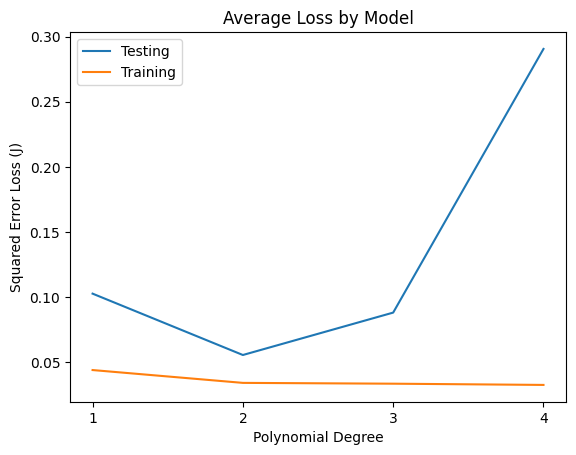

In [5]:
##############################################################################
#                     TODO: Plot the J curve                                 #
##############################################################################
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [sum(linear_test)/5, sum(quadratic_test)/5, sum(cubic_test)/5, sum(fourth_test)/5], label="Testing")
plt.plot([1, 2, 3, 4], [sum(linear_train)/5, sum(quadratic_train)/5, sum(cubic_train)/5, sum(fourth_train)/5], label="Training")
plt.xlabel("Polynomial Degree")
plt.ylabel("Squared Error Loss (J)")
plt.title("Average Loss by Model")
plt.xticks([1, 2, 3, 4])
plt.legend()
plt.show()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss **which model is the best** for the record time prediction.

**Your Answer:**  Based on the data and the above plot, the model which is best suited at predicting record times for the women's 100 meter dash in the olympics is the the quadratic model, which shows the lowest average testing loss in 5-Fold Cross validation. This insinuates that the quadratic model trained on the full dataset is most appropriate at predicting unseen data. 

Next, compute the final weights of the best model utilizing the **complete data set**

y = 0.00020636903843951156x^2 + -0.04324827058227601x + 13.130719522120524


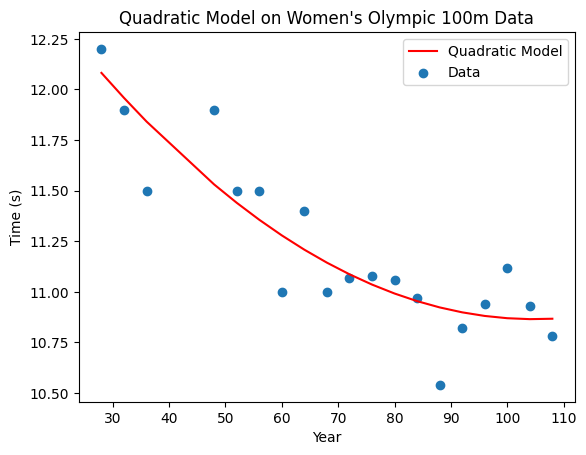

In [6]:
##############################################################################
#              TODO: Calculate the final regression model                    #
##############################################################################
# Weights for the full dataset
quadratic_weights = quadratic_regression(years, times)

# Model for the full dataset
quadratic_model = quadratic_weights[0] * np.power(np.array(years), 2) + quadratic_weights[1] * np.array(years) + quadratic_weights[2]

# print the quadratic model equation with the weights
print("y = {}x^2 + {}x + {}".format(quadratic_weights[0], quadratic_weights[1], quadratic_weights[2]))

# plot the quadratic model
plt.plot(years, quadratic_model, label="Quadratic Model", color="red")
plt.scatter(years, times, label="Data")
plt.xlabel("Year")
plt.ylabel("Time (s)")
plt.title("Quadratic Model on Women's Olympic 100m Data") 
plt.legend()
plt.show()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Prediction Using the Best Model

Write a Python program that takes a **year** as input, then outputs the winning women’s Olympic 100-meter **race time** for that year (round to two decimal places). You need to try and print out the results of **at least three different years**, and the final trial should output the race time of **2024**.

In [7]:
##############################################################################
#         TODO: Predict the race time using the best model                   #
##############################################################################
def quadratic_prediction(year):
    result = quadratic_weights[0] * np.power(year, 2) + quadratic_weights[1] * year + quadratic_weights[2]
    return round(result, 2)

print("The predicted time for 1960 is {} seconds".format(quadratic_prediction((1960-1900))))
print("The predicted time for 1990 is {} seconds".format(quadratic_prediction((1990-1900))))
print("The predicted time for 2024 is {} seconds".format(quadratic_prediction((2024-1900))))
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

The predicted time for 1960 is 11.28 seconds
The predicted time for 1990 is 10.91 seconds
The predicted time for 2024 is 10.94 seconds
